# Recurrent Neural Network

Split Text into Lines

In [4]:
with open('data.txt', 'r') as file:
    text = file.read()
    lines = text.lower().split('\n')

Split Text into Words

In [5]:
from keras.preprocessing.text import text_to_word_sequence, Tokenizer

In [6]:
words = text_to_word_sequence(text)

Tokenize Input Text

In [7]:
tokenizer = Tokenizer()

In [8]:
tokenizer.fit_on_texts(words)

Get the Vocabulary Size

In [9]:
vocabulary_size = len(tokenizer.word_index)+1
vocabulary_size

584

Build Sequences

In [10]:
sequences = tokenizer.texts_to_sequences(lines)
sequences

[[190, 191, 192, 193, 98, 99, 1],
 [1],
 [7, 100, 27, 194, 101, 102, 44, 1],
 [1],
 [19, 34, 3, 195, 58, 35, 36, 196, 1],
 [1],
 [16, 103, 104, 101, 105, 16, 197, 1],
 [1],
 [19, 2, 198, 6, 15, 67, 199, 59, 1],
 [1],
 [200, 4, 201, 202, 13, 11, 203, 204, 1],
 [1],
 [205, 28, 206, 37, 207, 106, 1],
 [1],
 [4, 11, 4, 208, 1, 6, 4, 45, 11, 107, 209, 1],
 [1],
 [2, 7, 24, 46, 3, 108, 68, 210, 1],
 [1],
 [5, 211, 212, 6, 3, 213, 214, 1],
 [1],
 [109, 15, 67, 215, 216, 4, 217, 1],
 [1],
 [5, 1, 103, 218, 1, 219, 110, 8, 220, 221, 3, 25, 1, 38, 111, 47, 222, 12, 1],
 [1],
 [1, 1, 1, 6, 223, 3, 108, 224, 1, 35, 3, 225, 5, 10, 1],
 [1],
 [17, 226, 227, 69, 228, 4, 229, 1],
 [1],
 [5, 230, 112, 231, 8, 4, 27, 232, 1],
 [1],
 [4, 233, 234, 235, 20, 236, 39, 46, 1],
 [1],
 [48, 12, 28, 237, 238, 9, 239, 240, 241, 1],
 [1],
 [29, 70, 242, 1, 37, 30, 4, 21, 106, 1],
 [1],
 [37, 30, 3, 71, 9, 4, 113, 243, 1],
 [1],
 [6, 244, 1, 109, 15, 67, 112, 245, 59, 1],
 [1],
 [40, 72, 30, 246, 73, 1, 5, 247, 11

Build Subsequences

In [11]:
subsequences= []
for sequence in sequences:
    for i in range(1, len(sequence)):
        subsequence = sequence[:i+1]
        subsequences.append(subsequence)

Pad the Subsequences

In [12]:
from keras.preprocessing.sequence import pad_sequences
sequence_length= max([len(sequence) for sequence in sequences] )
sequences= pad_sequences(subsequences, maxlen= sequence_length, padding = 'pre')

Build Input and Output

In [13]:
from keras.utils import to_categorical

In [14]:
x, y = sequences[:,:-1], sequences[:,-1]

In [15]:
y = to_categorical(y, num_classes= vocabulary_size)
y[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Network Architecture

In [16]:
from keras.models import Sequential
seq_model = Sequential()

W0620 09:33:51.293936 29364 deprecation_wrapper.py:119] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



Add the Embedding Layer

In [17]:
from keras.layers import Embedding
seq_model.add(Embedding(vocabulary_size, 100, input_length = sequence_length -1))

W0620 09:33:56.036818 29364 deprecation_wrapper.py:119] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0620 09:33:56.088391 29364 deprecation_wrapper.py:119] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Add LSTM Layer

In [18]:
from keras.layers import LSTM
seq_model.add(LSTM(100))

Add Dropout Layer

In [19]:
from keras.layers import Dropout
seq_model.add(Dropout(0.1))

W0620 09:34:00.768660 29364 deprecation_wrapper.py:119] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0620 09:34:00.783540 29364 deprecation.py:506] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Add the Output Layer

In [20]:
from keras.layers import Dense
seq_model.add(Dense(units = vocabulary_size, activation = 'softmax'))

Build the RNN

In [21]:
seq_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics =['accuracy'])

W0620 09:34:33.815283 29364 deprecation_wrapper.py:119] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0620 09:34:33.861382 29364 deprecation_wrapper.py:119] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



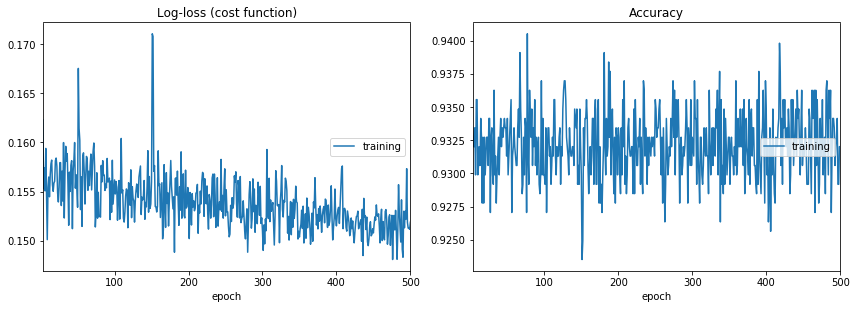

Log-loss (cost function):
training   (min:    0.148, max:    0.171, cur:    0.152)

Accuracy:
training   (min:    0.924, max:    0.941, cur:    0.932)


In [28]:
import livelossplot
plot_loss = livelossplot.PlotLossesKeras()

seq_model.fit(x, y, callbacks= [plot_loss], epochs = 500)

In [29]:
seq_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 18, 100)           58400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 584)               58984     
Total params: 197,784
Trainable params: 197,784
Non-trainable params: 0
_________________________________________________________________


Evaluate the Model

In [31]:
scores = seq_model.evaluate(x, y, verbose=0)
print("%s: %.2f%%" % (seq_model.metrics_names[1], scores[1]*100))

acc: 93.77%
